In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving USA_Housing.csv to USA_Housing.csv


In [3]:
import pandas as pd

df = pd.read_csv("USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
# check missing values
print("Missing values:\n", df.isnull().sum())

# check duplicates
print("Duplicate rows:", df.duplicated().sum())

# remove duplicates
df = df.drop_duplicates()

Missing values:
 Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64
Duplicate rows: 0


In [5]:
#Separate numeric and categorical columns
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

# Remove 'Price' from num_cols as it's the target variable
if 'Price' in num_cols:
    num_cols.remove('Price')

print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

Numeric columns: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']
Categorical columns: ['Address']


In [6]:
#Handle missing values
# numeric imputation (median)
num_imputer = SimpleImputer(strategy='median')

# categorical imputation (most frequent)
cat_imputer = SimpleImputer(strategy='most_frequent')

In [7]:
#One-hot encode categorical data
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [8]:
#Combine everything using ColumnTransformer
# Re-run this cell after num_cols has been updated.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', num_imputer),
            ('scaler', StandardScaler())
        ]), num_cols),

        ('cat', Pipeline([
            ('imputer', cat_imputer),
            ('encoder', ohe)
        ]), cat_cols)
    ]
)

In [9]:
#Split data into features (X) and target (y)
target = 'Price'  # change if needed

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#Save cleaned/preprocessed dataset
cleaned = df.copy()
cleaned.to_csv("USA_Housing_Cleaned.csv", index=False)
print("✅ Cleaned dataset saved as 'USA_Housing_Cleaned.csv'")

✅ Cleaned dataset saved as 'USA_Housing_Cleaned.csv'


In [11]:
try:
    #Check feature importance
    if hasattr(model.named_steps['regressor'], 'coef_'):
        print("Feature coefficients (after preprocessing):")
        print(model.named_steps['regressor'].coef_)
except NameError:
    print("Error: The 'model' has not been defined yet. Please run the model building and regression analysis cell (cell `ha95ILpZ1426`) first to train the model.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Error: The 'model' has not been defined yet. Please run the model building and regression analysis cell (cell `ha95ILpZ1426`) first to train the model.


In [12]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


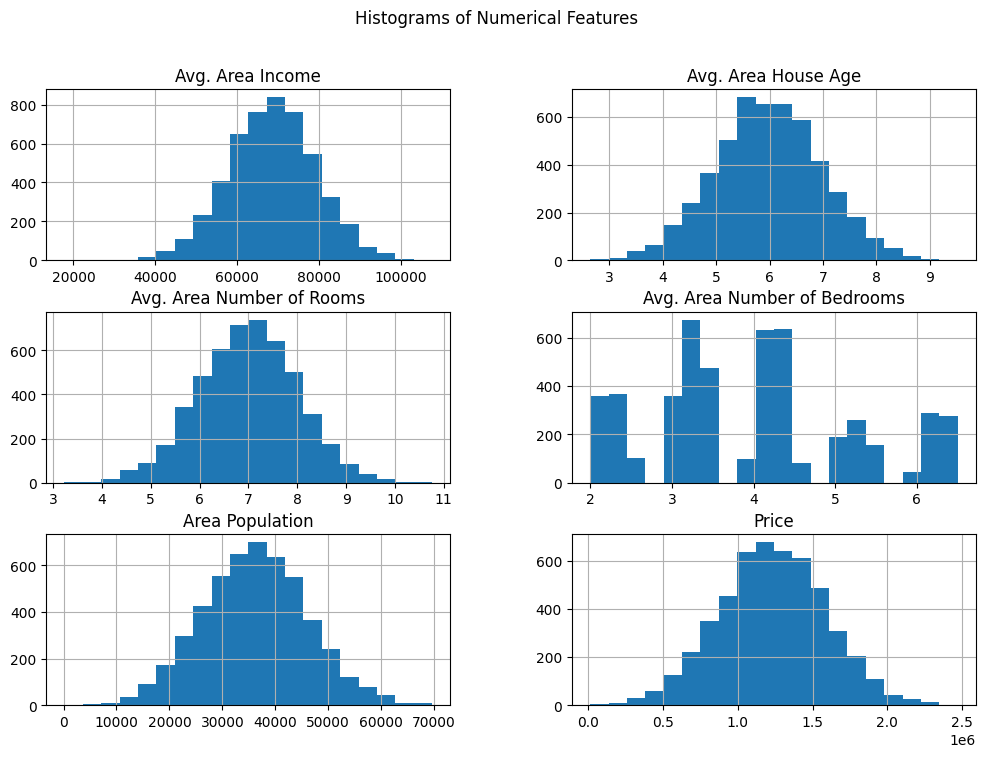

In [13]:
#  Histograms (Feature Distribution)
import matplotlib.pyplot as plt

df.hist(figsize=(12,8), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()

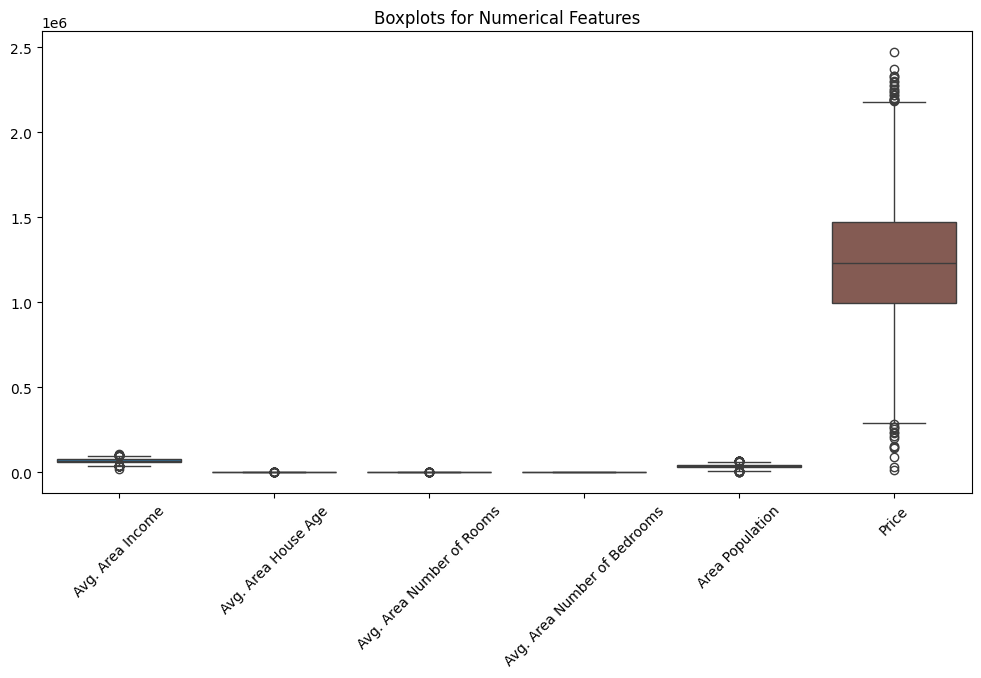

In [14]:
# STEP 3 — Boxplots (Outlier Detection)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include=['int64','float64']))
plt.title("Boxplots for Numerical Features")
plt.xticks(rotation=45)
plt.show()

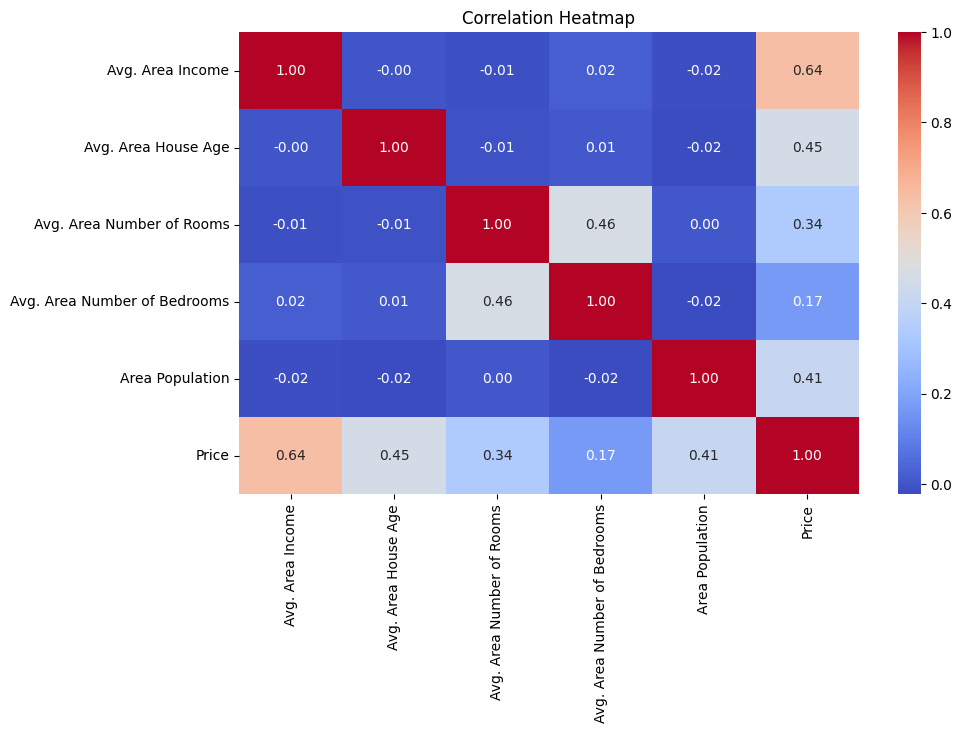

In [15]:
# STEP 4 — Correlation Heatmap (numeric columns only)
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

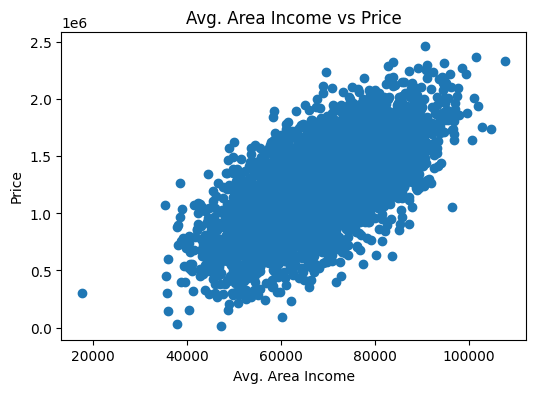

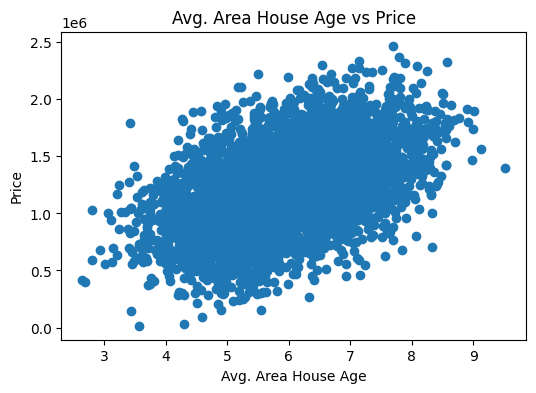

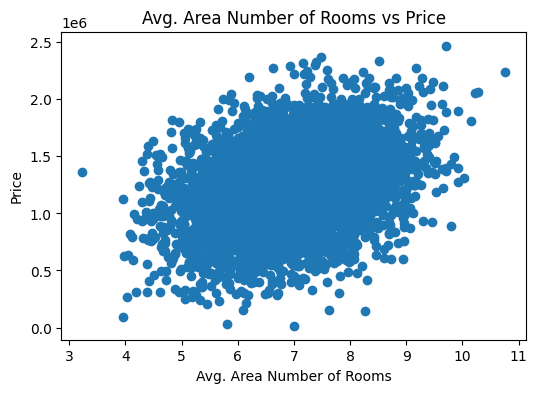

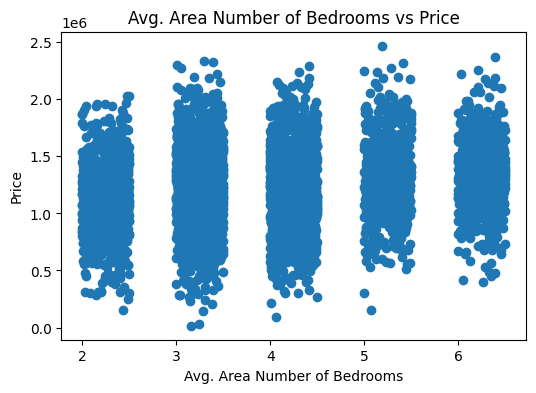

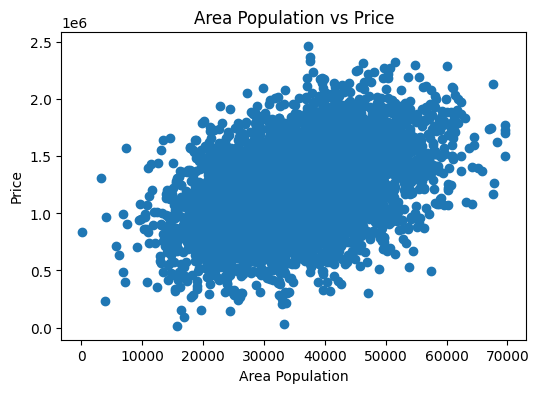

In [16]:
# Input vs Output Pattern (MOST IMPORTANT)
import matplotlib.pyplot as plt

features = [
    'Avg. Area Income',
    'Avg. Area House Age',
    'Avg. Area Number of Rooms',
    'Avg. Area Number of Bedrooms',
    'Area Population'
]

for col in features:
    plt.figure(figsize=(6,4))
    plt.scatter(df[col], df['Price'])
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.title(f"{col} vs Price")
    plt.show()

In [17]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


✅ Linear Regression model has been trained successfully!

Sample Prediction Comparison:
   Actual Price  Predicted Price
0  1.339096e+06     1.308560e+06
1  1.251794e+06     1.237022e+06
2  1.340095e+06     1.243397e+06
3  1.431508e+06     1.228898e+06
4  1.042374e+06     1.063344e+06
5  1.555321e+06     1.543960e+06
6  1.250882e+06     1.094797e+06
7  1.039381e+06     8.333998e+05
8  8.324752e+05     7.885406e+05
9  1.420648e+06     1.469646e+06

📌 MODEL PERFORMANCE
MAE: 80877.76303977017
MSE: 10089003188.711672
RMSE: 100444.0301297776
R² Score: 0.9179972203628644

Intercept: 1229576.9925600903

📌 Feature Coefficients:
                                            Feature    Coefficient
0                                  Avg. Area Income  231682.183742
1                               Avg. Area House Age  163538.420980
2                         Avg. Area Number of Rooms  120684.509396
3                      Avg. Area Number of Bedrooms    3011.267384
4                                   A

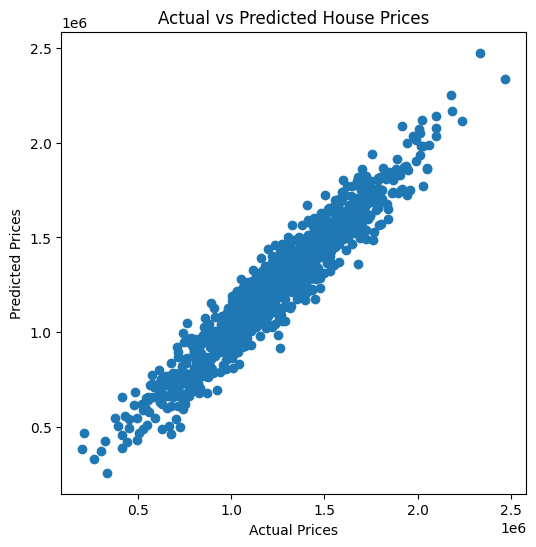

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------------------------------
# BUILD PIPELINE
# ---------------------------------------------------
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train model
model.fit(X_train, y_train)
print("✅ Linear Regression model has been trained successfully!")

# ---------------------------------------------------
# PREDICTIONS
# ---------------------------------------------------
y_pred = model.predict(X_test)

comparison = pd.DataFrame({
    'Actual Price': y_test.values[:10],
    'Predicted Price': y_pred[:10]
})

print("\nSample Prediction Comparison:")
print(comparison)

# ---------------------------------------------------
# EVALUATION METRICS
# ---------------------------------------------------
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📌 MODEL PERFORMANCE")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

# ---------------------------------------------------
# REGRESSION COEFFICIENTS
# ---------------------------------------------------
reg = model.named_steps['regressor']
print("\nIntercept:", reg.intercept_)

encoded_cat_features = (
    model.named_steps['preprocessor']
    .named_transformers_['cat']
    .get_feature_names_out(cat_cols)
)

final_feature_names = num_cols + list(encoded_cat_features)

coef_df = pd.DataFrame({
    'Feature': final_feature_names,
    'Coefficient': reg.coef_
})

print("\n📌 Feature Coefficients:")
print(coef_df)

# ---------------------------------------------------
# VISUALIZATION
# ---------------------------------------------------
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


✅ Linear Regression model has been trained successfully!

Sample Prediction Comparison (Actual vs Predicted):
   Actual Price  Predicted Price
0  1.339096e+06     1.308560e+06
1  1.251794e+06     1.237022e+06
2  1.340095e+06     1.243397e+06
3  1.431508e+06     1.228898e+06
4  1.042374e+06     1.063344e+06
5  1.555321e+06     1.543960e+06
6  1.250882e+06     1.094797e+06
7  1.039381e+06     8.333998e+05
8  8.324752e+05     7.885406e+05
9  1.420648e+06     1.469646e+06

📌 MODEL PERFORMANCE
Mean Absolute Error (MAE): 80877.76303977017
Mean Squared Error (MSE): 10089003188.711672
Root Mean Squared Error (RMSE): 100444.0301297776
R² Score: 0.9179972203628644

Intercept: 1229576.9925600903

📌 Feature Coefficients:
                                            Feature    Coefficient
0                                  Avg. Area Income  231682.183742
1                               Avg. Area House Age  163538.420980
2                         Avg. Area Number of Rooms  120684.509396
3            

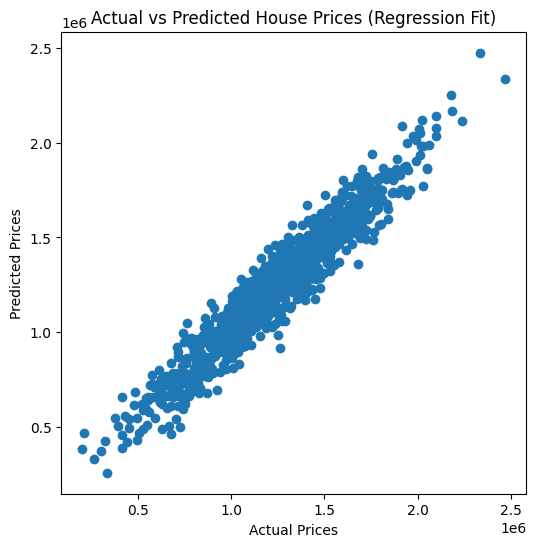

In [20]:
#   MODEL BUILDING & REGRESSION ANALYSIS
# Re-run this cell after the preprocessor has been updated.
from sklearn.linear_model import LinearRegression

# Build pipeline = preprocessing + model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train model
model.fit(X_train, y_train)
print("✅ Linear Regression model has been trained successfully!")

# ---------------------------------------------------
#  MAKE PREDICTIONS
# ---------------------------------------------------
y_pred = model.predict(X_test)

# Compare actual vs predicted (first 10)
comparison = pd.DataFrame({
    'Actual Price': y_test.values[:10],
    'Predicted Price': y_pred[:10]
})
print("\nSample Prediction Comparison (Actual vs Predicted):")
print(comparison)

# ---------------------------------------------------
#  EVALUATION METRICS
# ---------------------------------------------------
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📌 MODEL PERFORMANCE")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

# ---------------------------------------------------
#  REGRESSION COEFFICIENTS (IMPORTANT FOR REPORT)
# ---------------------------------------------------
reg = model.named_steps['regressor']

print("\nIntercept:", reg.intercept_)

# Get feature names after preprocessing
encoded_cat_features = model.named_steps['preprocessor'] \
    .named_transformers_['cat'] \
    .named_steps['encoder'] \
    .get_feature_names_out(cat_cols)

final_feature_names = num_cols + list(encoded_cat_features)

coef_df = pd.DataFrame({
    'Feature': final_feature_names,
    'Coefficient': reg.coef_
})

print("\n📌 Feature Coefficients:")
print(coef_df)

# ---------------------------------------------------
#  REGRESSION VISUALIZATION (Actual vs Predicted)
# ---------------------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices (Regression Fit)")
plt.show()
